# Project: UK Customer Spending Analysis

### Scenario:

As an analyst for ProWidget Systems, a UK-based B2B (business-to-business) retailer, I’ve been asked to report on spending volumes for London-based customers versus those based in the rest of the United Kingdom.  

The board want to know:
- Which UK cities are currently underserved
- Whether their customers are primarily London based

### My Approach

I am approaching this project in a straightforward and results-oriented way.  
My initial goal is to reach a clear and actionable outcome.

After understanding the proem — which is to find the revenue generated in London and compare it with other cities across the United Kingdom to identify underserved ,eas — I will:

- **Frame the final answer**, as it will guide me throughout the entire analysis.  
  The expected outcome is a table or bar chart showing the total revenue grouped by city, with **London highlighted** and the **least-performing cities** clearly visible.  

- **Gather and explore the data**, checking for missing values, formatting issues, and data types, and gaining a brief understanding of each column.  

- **Perform the analysis**, which in this case involves grouping customers by city, summing their spending, and visualizing the results.  

- **Communicate the findings** clearly to the board, focusing on insights that support strategic decisions.


My Approach

I am approaching this project in a straightforward and results-oriented way.
My initial goal is to reach a clear and actionable outcome.

After understanding the problem — which is to find the revenue generated in London and compare it with other cities across the United Kingdom to identify underserved areas — I will:

Frame the final answer, as it will guide me throughout the entire analysis.
The expected outcome is a table or bar chart showing the total revenue grouped by city, with London highlighted and the least-performing cities clearly visible.

Gather and explore the data, checking for missing values, formatting issues, and data types, and gaining a brief understanding of each column.

Perform the analysis, which in this case involves grouping customers by city, summing their spending, and visualizing the results.

Communicate the findings clearly to the board, focusing on insights that support strategic decisions.

In [58]:
# Load the data
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

customers = pd.read_csv("addresses.csv")
print(customers.head())
print('-----------------------')
print(customers.shape)

   company_id                                            address  total_spend
0           1  APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...         5700
1           2           107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ         4700
2           3  43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...         5900
3           4  HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...         7200
4           5  AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...         4600
-----------------------
(100000, 3)


## Data Understanding

In [59]:
# Investigating the missing values
customers.isna().sum()

company_id       0
address        968
total_spend      0
dtype: int64

>We see 968 adresses missing out of 100.000. Because its less than 1% of the entire data, we find its less relevant, so we are going the drop its.

In [60]:
# Delete the rows with missing addresses
customers = customers.dropna(subset=['address'])
print(customers.isna().sum())
print(customers.shape)

company_id     0
address        0
total_spend    0
dtype: int64
(99032, 3)


In [61]:
# Explore the numerical column (total_spend)
customers.total_spend.describe()

count    99032.000000
mean      4951.673197
std       1500.642398
min          0.000000
25%       3900.000000
50%       5000.000000
75%       6000.000000
max      11700.000000
Name: total_spend, dtype: float64

>We see values start from 0 to almost 12,000, so no negative values.
>
>At the first glance, we can see that there are positive outliers due to the difference between the IQR and the maximum.
>
>So, because we don't have a lot of variables - like number of items, number of purchases and son on - that can allow us to go further, we'll take it like this and it could be a way to go back to the stackeholders in the real-life to ask more questions.

In [62]:
# Extracting city column from address
for address in customers.address.head():
    print(address, '\n')

APARTMENT 2,
52 BEDFORD ROAD,
LONDON,
ENGLAND,
SW4 7HJ 

107 SHERINGHAM AVENUE,
LONDON,
N14 4UJ 

43 SUNNINGDALE,
YATE,
BRISTOL,
ENGLAND,
BS37 4HZ 

HAWESWATER HOUSE,
LINGLEY MERE BUSINESS PARK,
LINGLEY GREEN AVENUE,
GREAT SANKEY, WARRINGTON,
WA5 3LP 

AMBERFIELD BARN HOUSE AMBER LANE,
CHART SUTTON,
MAIDSTONE,
ENGLAND,
ME17 3SF 



> It appears that addresses end with the postcode, but sometimes London addresses contain a line for England, and sometimes they don’t.
>
> What about looking for the string “London” to identify customers in London? Would that be enough? Probably not. We would end up including people who live on “London Road” in other towns.
>
> In our sample (first rows), all addresses were uppercase, but we should not assume this will be the case for all 100,000 rows, so we should ensure they are all uppercase ourselves.

## Data Preparation

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Create a cleaned address 
customers['address_clean'] = customers.address.str.upper()

print(len(customers[customers.address_clean.str.contains('LONDON')]))
print(len(customers[customers.address_clean.str.contains('LONDON,')]))

21768
20831


> The output of these lines of code is 21,768 and 20,831, respectively, which means nearly 1,000 rows are no longer selected when we add the commas

In [64]:
# let the number of component related to address structure (specifically separated by \n)
customers['address_lines'] = customers.address_clean.str.split(',\n').apply(len)

print(customers.address_lines.value_counts())

address_lines
5    45931
4    35850
6    13909
3     3284
2       52
1        6
Name: count, dtype: int64


> Let assume the complete address have 6 elements:
> Apart No,
> Street No Street name,
> City,
> Province/Territory code,
> Postal code
> Country
> 
> In our data we observe some addresses with of only one or two lines.

In [65]:
customers.columns

Index(['company_id', 'address', 'total_spend', 'address_clean', 'address_lines'], dtype='object')

In [66]:
# Let examine how look the shorter addresses
print(customers.loc[customers['address_lines'] == 1, 'address_clean'])
print('-----------------------------------------')
print(customers[customers['address_lines'] == 2].sample(5, random_state=1) ['address_clean'])

17789                      FALKIRK
31897                   HADDINGTON
61750          CREAG BHAITHEACHAIN
75330                     NEWMILNS
78045    REDCLOAK FARM, STONEHAVEN
90897     REFER TO PARENT REGISTRY
Name: address_clean, dtype: object
-----------------------------------------
62736    BRANCH REGISTRATION,\nREFER TO PARENT REGISTRY
5343                     7 RUTLAND SQUARE,\nEDINBURGH 1
81020                            EASTER SOFTLAW,\nKELSO
64065                  242 WEST GEORGE STREET,\nGLASGOW
60867                       1 GEORGE STREET,\nEDINBURGH
Name: address_clean, dtype: object


> We see the variability in our data.
> Some rows are simply a city (Falkirk, Haddington...);
> there are entirely missing addresses referring us to a parent registry;
> and we also have PO Box addresses.
> It is unlikely we can come up with a rule to extract cities purely based on their position in the lines of an address without writing a lot of bespoke code.
>
> Just to recenter everything, my goal here is to create a city column.
> Due to the bunch of ways in the address column, we would require a comprehensive list of cities in the united Kingdom, which is provided by the UK government and match it with the recorded database received.

After visiting the site https://www.gov.uk/government/publications/list-of-cities/list-of-cities-html, there is a list of just 76 cities, so I've copied and pasted it into Excel.

In [67]:
# Load my cities file created.
cities = pd.read_csv('cities.csv', header=None, names=['city'])
print(cities.head())
print('---------------------------')
print(cities.shape)

              city
0          England
1             Bath
2      Birmingham*
3        Bradford*
4  Brighton & Hove
---------------------------
(80, 1)


> The shape shows 80 rows while we know is 76, that means we've copied also the header of cities which is the countries
> 
> So that heading values England, Scotland, Wales, and Northern Ireland need to be removed.
> 
> Then, the trailing asterisk * character also needs to be trimmed, and the remaining city names should be uppercased to match our address data.

In [68]:
# Cleaning cities list
cities = cities[~cities['city'].isin(['England', 'Scotland', 'Wales', 'Northern Ireland'])]
cities = cities.dropna(subset=['city'])

cities['city'] = cities['city'].str.replace('*', '', regex=False) # Delete the astherisk

cities['city'] = cities['city'].str.upper() # COnvert its in uppercase
cities.head()

,city
1,BATH
2,BIRMINGHAM
3,BRADFORD
4,BRIGHTON & HOVE
5,BRISTOL


Now, we will tag the address in our own DataFrame to the ones imported on the UK gov website.

In [69]:
for city in cities['city'].values:
    customers.loc[customers['address_clean'].str.contains(f"\n{city},"), 
    'city'] = city
    
customers['city'] = customers['city'].fillna('OTHER')
customers.head()

,company_id,address,total_spend,address_clean,address_lines,city
0,1,"APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...",5700,"APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...",5,LONDON
1,2,"107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ",4700,"107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ",3,LONDON
2,3,"43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...",5900,"43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...",5,BRISTOL
3,4,"HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...",7200,"HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...",5,OTHER
4,5,"AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...",4600,"AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...",5,OTHER


Now let's explore the new city column

In [70]:
customers['city'].nunique()

75

In [71]:
# Count the number of city 
customers.city.value_counts().head()

city
OTHER         54458
LONDON        20762
MANCHESTER     1902
BIRMINGHAM     1866
GLASGOW        1273
Name: count, dtype: int64

> Over half of our data is in the "OTHER" category, which means half of our customer base is established outside of major cities.

In [72]:
# Display some cities in "OTHER" category
sample_other = customers[customers['city'] == "OTHER"].sample(5, random_state=0)
for address in sample_other['address_clean'].values:
    print(address, "\n")

7 RILEY ROAD,
ENFIELD,
UNITED KINGDOM,
EN3 5QB 

OFFICE 24,
RURAL INNOVATION CENTER,
STONELEIGH,
UNITED KINGDOM,
CV8 2LG 

140 MORELAND ROAD,
SOUTH SHIELDS,
UNITED KINGDOM,
NE34 8NJ 

44 THE PANTILES,
TUNBRIDGE WELLS,
ENGLAND,
TN2 5TN 

C/O MOLECULAR PRODUCTS LIMITED PARKWAY,
HARLOW BUSINESS PARK,
HARLOW,
ESSEX,
ENGLAND,
CM19 5FR 



> Some of these addresses relate to towns, but there is an address in Twickenham, which is a suburban district in London. While the address did not contain the word “London,” that customer should be categorized as being London based. 

**Note:** Unless you have knowledge of UK geography, you may miss these instances of London addresses without the word “London” in them. This highlights how important domain knowledge is for an analyst and why you should work closely with domain experts.

In [73]:
# Checking the cities correspondents in both DataFrame
missing_in_customers = set(cities['city'].str.upper()) - set(customers['city'].str.upper())
extra_in_customers = set(customers['city'].str.upper()) - set(cities['city'].str.upper())

summary = pd.DataFrame({
    'missing_in_customers': sorted(missing_in_customers),
    'extra_in_customers': sorted(extra_in_customers)
})
summary

,missing_in_customers,extra_in_customers
0,KINGSTON-UPON-HULL,OTHER


> This means the city Kingston-Upon-Hull is not in the city columns of our customer address data.

We think that the city is usually abbreviated to just "Hull" which again is a case of applying specific domain knowledge to the problem.<br>
So, let's look for that in our adddress data

In [74]:
customers[customers["address_clean"].str.contains("\nHULL")]

,company_id,address,total_spend,address_clean,address_lines,city
455,456,"349 BEVERLEY ROAD,\nANLABY,\nHULL,\nENGLAND,\n...",3800,"349 BEVERLEY ROAD,\nANLABY,\nHULL,\nENGLAND,\n...",5,OTHER
1139,1140,"90 CALVERT LANE,\nHULL,\nENGLAND,\nHU4 6BJ",6000,"90 CALVERT LANE,\nHULL,\nENGLAND,\nHU4 6BJ",4,OTHER
1822,1823,"ACER GLADE BLACK TUP LANE,\nARNOLD,\nHULL,\nEN...",4600,"ACER GLADE BLACK TUP LANE,\nARNOLD,\nHULL,\nEN...",5,OTHER
1831,1832,"10 GORDON STREET,\nHULL,\nENGLAND,\nHU3 3HN",5300,"10 GORDON STREET,\nHULL,\nENGLAND,\nHU3 3HN",4,OTHER
1921,1922,"70 WRIGHT STREET,\nHULL,\nENGLAND,\nHU2 8JD",6100,"70 WRIGHT STREET,\nHULL,\nENGLAND,\nHU2 8JD",4,OTHER
2137,2138,"32 KING EDWARD STREET,\nHULL,\nENGLAND,\nHU1 3SS",7300,"32 KING EDWARD STREET,\nHULL,\nENGLAND,\nHU1 3SS",4,OTHER
2344,2345,"Riverside House,\n11-12 Nelson Street,\nHull,\...",1700,"RIVERSIDE HOUSE,\n11-12 NELSON STREET,\nHULL,\...",5,OTHER
2348,2349,"5 MARITIME HOUSE MARITIME BUSINESS PARK,\nLIVI...",6000,"5 MARITIME HOUSE MARITIME BUSINESS PARK,\nLIVI...",6,OTHER
2891,2892,"368 STAVELEY ROAD,\nHULL,\nENGLAND,\nHU9 4BY",1800,"368 STAVELEY ROAD,\nHULL,\nENGLAND,\nHU9 4BY",4,OTHER
3308,3309,"UNIT G7 THE BLOC 38 SPRINGFIELD WAY,\nANLABY,\...",7600,"UNIT G7 THE BLOC 38 SPRINGFIELD WAY,\nANLABY,\...",5,OTHER


> We see many addrresses named like that, so we will change their cities OTHER by KINGSTON-UPON-HULL

In [81]:
customers.loc[customers["address_clean"].str.contains("\nHULL"), "city"] = "KINGSTON-UPON-HULL"

In [82]:
customers.city.value_counts().head()

city
OTHER         54164
LONDON        20762
MANCHESTER     1902
BIRMINGHAM     1866
GLASGOW        1273
Name: count, dtype: int64

>It decreases the OTHER by 294 

Now I think I've done the data wrangling, let's analyze the spending

## Analysis

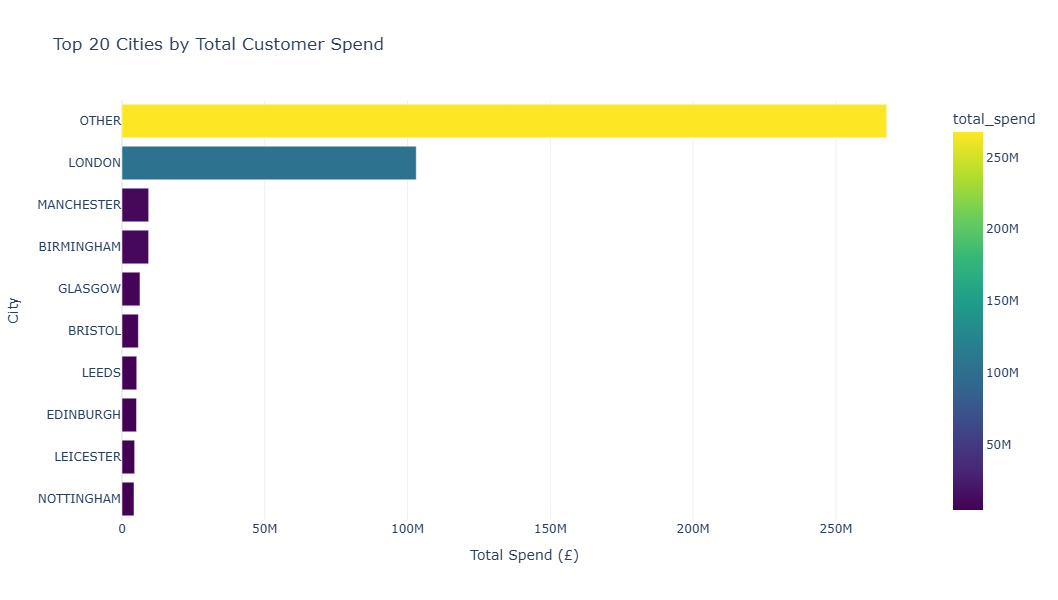

In [112]:
import plotly.express as px

# Step 1: Aggregate and sort data
top_10_spend = (customers.groupby("city", as_index=False)["total_spend"].sum()
    .sort_values(by="total_spend", ascending=False).head(10))

# Step 2: Create interactive bar chart
fig = px.bar(
    top_10_spend,
    x="total_spend",
    y="city",
    orientation="h",
    title="Top 20 Cities by Total Customer Spend",
    color="total_spend",
    color_continuous_scale="Viridis",
    hover_data={
        "city": True,
        "total_spend": ":,.0f"  # comma format, no decimals
    },
)

# Step 3: Improve layout
fig.update_layout(
    width=750,
    height=600,
    xaxis_title="Total Spend (£)",
    yaxis_title="City",
    yaxis=dict(autorange="reversed"),  # highest at top
    template="plotly_white"
)

# Step 4: Display interactive chart
fig.show()

> The group OTHER has the highest spendings, it might include isle of Man and the overseas Territories.
> 
> It is followed by LONDON, whose spending is +10 times more than its closest follower city

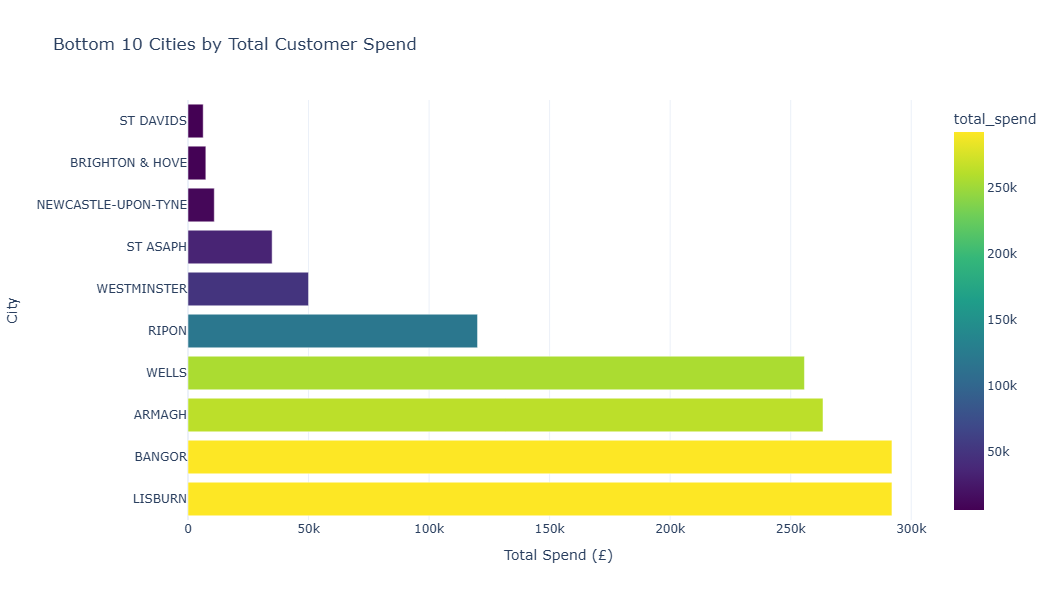

In [119]:
# Aggregate and sort data
bottom_10_spend = (customers.groupby("city", as_index=False)["total_spend"].sum()
    .sort_values(by="total_spend", ascending=True).head(10))

# Create interactive bar chart
fig = px.bar(
    bottom_10_spend,
    x="total_spend",
    y="city",
    orientation="h",
    title="Bottom 10 Cities by Total Customer Spend",
    color="total_spend",
    color_continuous_scale="Viridis",
    hover_data={
        "city": True,
        "total_spend": ":,.0f"  # comma format, no decimals
    },
)

# Step 3: Improve layout
fig.update_layout(
    width=750,
    height=600,
    xaxis_title="Total Spend (£)",
    yaxis_title="City",
    yaxis=dict(autorange="reversed"),  # highest at top
    template="plotly_white"
)

# Step 4: Display interactive chart
fig.show()

> ST DAVIDS has the smellest spending with £6,300 out the overall £409M
>
> Unfortunately, with the data currently available, I cannot conclude that these cities are underserved, as I lack demographic information to determine whether their spending levels are adequate or not.

In [122]:
# Calculate total spend for each category
total_spend = customers.groupby('city')['total_spend'].sum()

# Define categories
london_spend = total_spend.get('LONDON', 0)
other_spend = total_spend.get('OTHER', 0)
rest_spend = total_spend.drop(['LONDON', 'OTHER'], errors='ignore').sum()

# Create a new summary DataFrame or dictionary
spend_summary = {'LONDON': london_spend,
                 'OTHER': other_spend,
                 'REST OF CITIES': rest_spend}
# Convert dictionary into DataFrame
spend_df = pd.DataFrame(list(spend_summary.items()), columns=['City', 'Total Spend'])

# Calculate the grand total separately
grand_total = spend_df['Total Spend'].sum()

# Format the 'Total Spend' column with pound sign and thousands separator
spend_df['Total Spend'] = spend_df['Total Spend'].apply(lambda x: f"£{x:,.0f}")
formatted_total = f"£{grand_total:,.0f}"

# Display the result
# Step 5: Display formatted table with underline separator
print("City".ljust(20) + "Total Spend")
print("_______________________________")  # separator line between header and data
for i, row in spend_df.iterrows():
    print(f"{row['City']:<20}{row['Total Spend']}")
    if row['City'] == 'REST OF CITIES':   # separator before TOTAL
        print("_______________________________")

# Print the total line after separator
print(f"{'TOTAL':<20}{formatted_total}")

City                Total Spend
_______________________________
LONDON              £103,042,800
OTHER               £267,806,500
REST OF CITIES      £119,524,800
_______________________________
TOTAL               £490,374,100


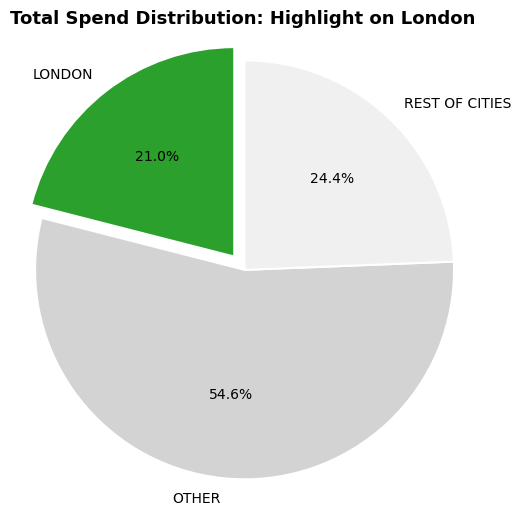

In [93]:
# Create the pie chart
plt.figure(figsize=(6, 6))

# Colors: make London green, others light gray
colors = ['#2ca02c', '#d3d3d3', '#f0f0f0']  # Green + light grays

# Explode: slightly separate London slice for emphasis
explode = [0.08, 0, 0]  # only the first slice (London) pops out

plt.pie(
    spend_summary.values(),
    labels=spend_summary.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Add title
plt.title('Total Spend Distribution: Highlight on London', fontsize=13, fontweight='bold')

# Equal aspect ratio for a perfect circle
plt.axis('equal')

plt.show()


The customers spend the most in bigger cities since there are generally more customers in larger cities, and London generates nearly as much income as all the other cities combined.

## Recommandations

- Enhance city identification

- Augment with demographics and dates
 
- Differentiate customer types

- Collaborate with stakeholders

## 🙏 Thank You 😊

Thank you for taking the time to explore this analysis.  
I hope it provided valuable insights into customer spending patterns across the United Kingdom.  

Your feedback and thoughts are always welcome — every discussion helps improve the quality and depth of future analyses.  